In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 6s 3us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.1054 - acc: 0.9570 - val_loss: 1.1098 - val_acc: 0.8000
Epoch 2/9
7982/7982 [==============================] - 1s 104us/step - loss: 0.1017 - acc: 0.9583 - val_loss: 1.1150 - val_acc: 0.8000
Epoch 3/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.1026 - acc: 0.9592 - val_loss: 1.0996 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.1031 - acc: 0.9573 - val_loss: 1.1242 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.0969 - acc: 0.9589 - val_loss: 1.1491 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.0986 - acc: 0.9564 - val_loss: 1.2301 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.0959 - acc: 0.9579 - val_loss: 1.1793 - val_acc: 0.7980
Epoch 8

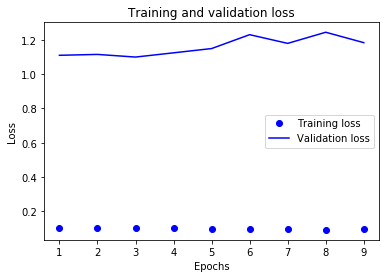

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

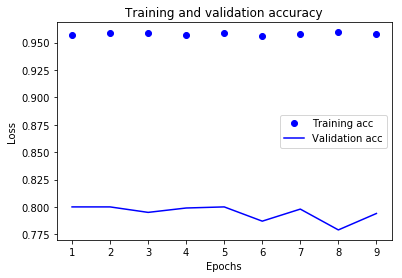

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 107us/step


[1.3474299406644392, 0.7800534283700843]

In [26]:
# Generate predictions for new data
predictions = model.predict(x_test)

predictions[0].shape

(46,)

In [27]:
np.sum(predictions[0])

0.99999994

In [28]:
np.argmax(predictions[0])

3